# Assignment 03 - Domains
Create a notebook called *assignment_03_pie.ipynb*. The note book should have a nice pie chart of peoples email domains in the csv file at the [URL](https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download). 

In [8]:
# import the necessary modules
import matplotlib.pyplot as plt 
import pandas as pd

In [9]:
# The data at the above URL can be downloaded then loaded, but in this instane it will be read from a path. 
path = 'https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download'
data = pd.read_csv(path)
print(data.shape)
print(data.head(3))

(1000, 9)
   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   

                           Email            Phone Date of birth  \
0            pwarner@example.org     857.139.8239    2014-01-27   
1  fergusonkatherine@example.net  +1-950-759-8687    1931-07-26   
2            fhoward@example.org    (599)782-0605    2013-11-25   

           Job Title  
0  Probation officer  
1             Dancer  
2               Copy  


### Extracting domain data

This dataset contain 1000 instances of nine variables. The variable of interest is *Email* with the domain of the email needing to be extracted. The domain of an email address comes after the **@** symbol and if you use Gmail then **gmail.com** is the domain. 

This domain can be extracted to a new column. There are many ways to do this (for example [here](https://www.geeksforgeeks.org/python-extract-domain-name-from-email-address/)) such as slicing to regular expressions (Regex), but in this case a *str.split()* of the **Email** column was used with a list comprehension. The **unique** function was used to show that there are three different domains in this
dataset of 1000 instances with roughly one third in each of the three identified domains. We can calcualte the exactly percentage with the pie chart. 

**Table 1:** Domains
|Domain  | Count |
|:-------------|:---:|
|*example.org*       |341 |
| *example.com*         |339 |
|  *example.net*        |320|

In [10]:
# list comprehension to return the last element by splitting at @
data['Domain'] = [domain[-1] for domain in data['Email'].str.split('@')]

print(data['Domain'].unique())
print(data['Domain'].value_counts())

['example.org' 'example.net' 'example.com']
Domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64


### Pie Chart 

Pie charts are used to show categorical data and the percertages. It works well for a small number of groups as with many groups it is hard to determine the exact percentage a group has. 

Pie chart created using [Matplotlib documentation](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html).

In [11]:
domain_data = data['Domain'].value_counts()

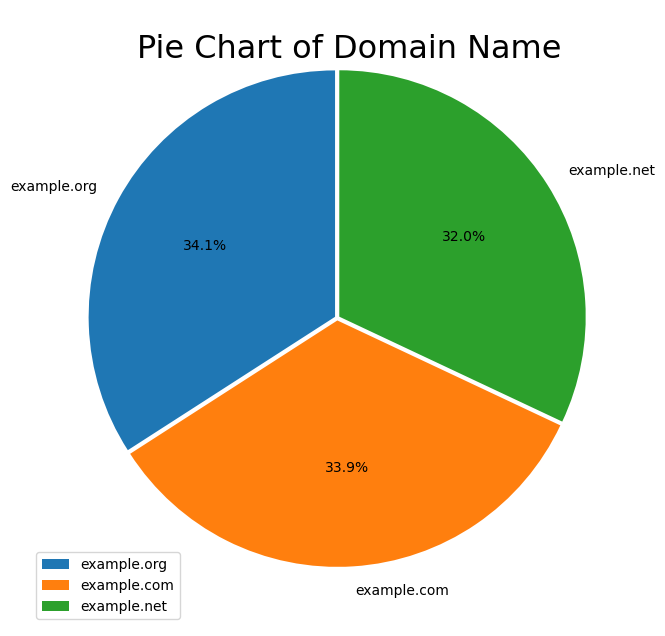

In [12]:
# Pie chart 

explode = (0.01, 0.01, 0.01)
fig, ax = plt.subplots(figsize=(16,8))
ax.pie(domain_data, explode=explode, labels=domain_data.index, autopct='%1.1f%%',startangle = 90)
ax.legend(loc=3)
fig.suptitle('Pie Chart of Domain Name', x=0.52, y=.85, size=23);

The percentages for each email domain is approximately oe third for each domain. Generally I find pie charts are hard to understand, but with only three groups and a similar number of value counts per group it works well here. 